In [1]:
from helpers import *

In [2]:
goi_id = getGOI()

goi_pat_log, X_log, y_log, X_log_train, X_log_test, y_log_train, y_log_test = getProcessedData(goi_id)

/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


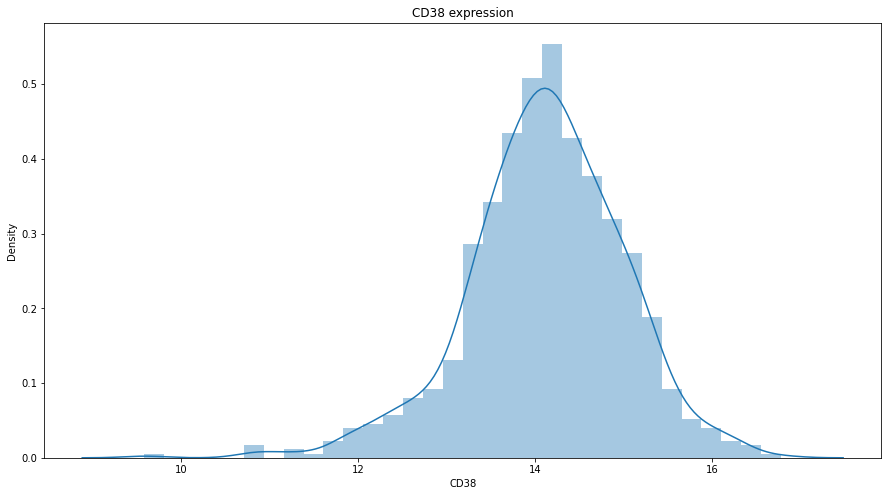

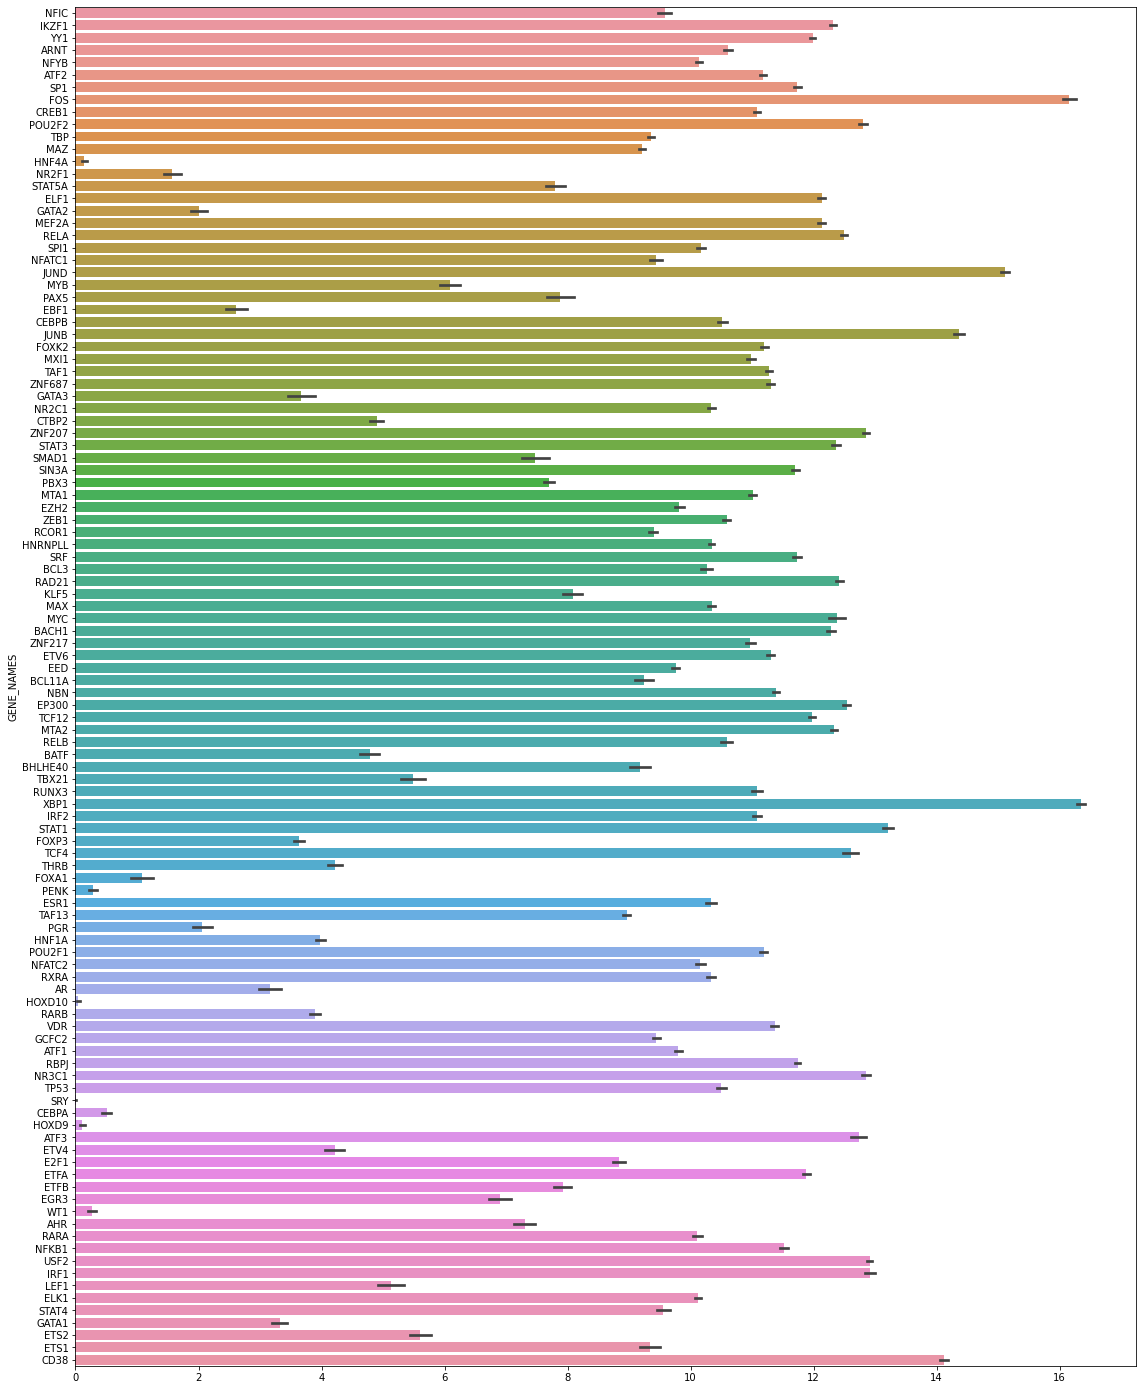

In [3]:
exploratoryPlots(y_log_train.append(y_log_test), goi_pat_log)

In [4]:
xgb, params = getModelAndBestParams(X_log_train, y_log_train, 10)

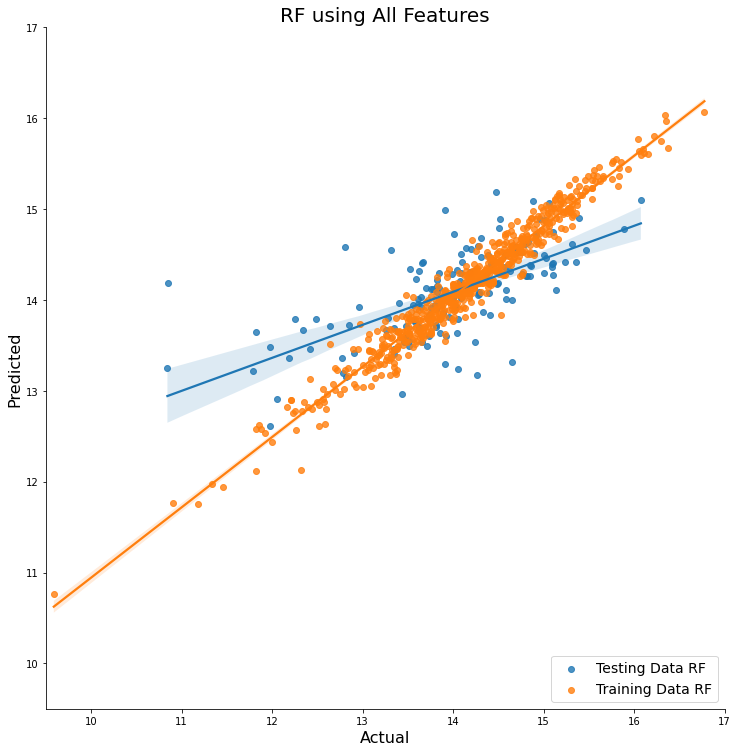

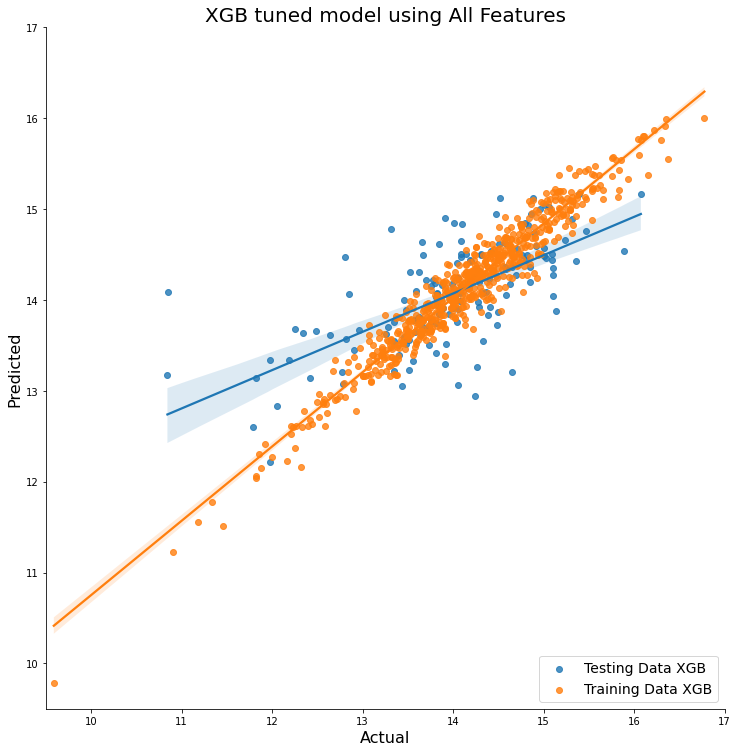

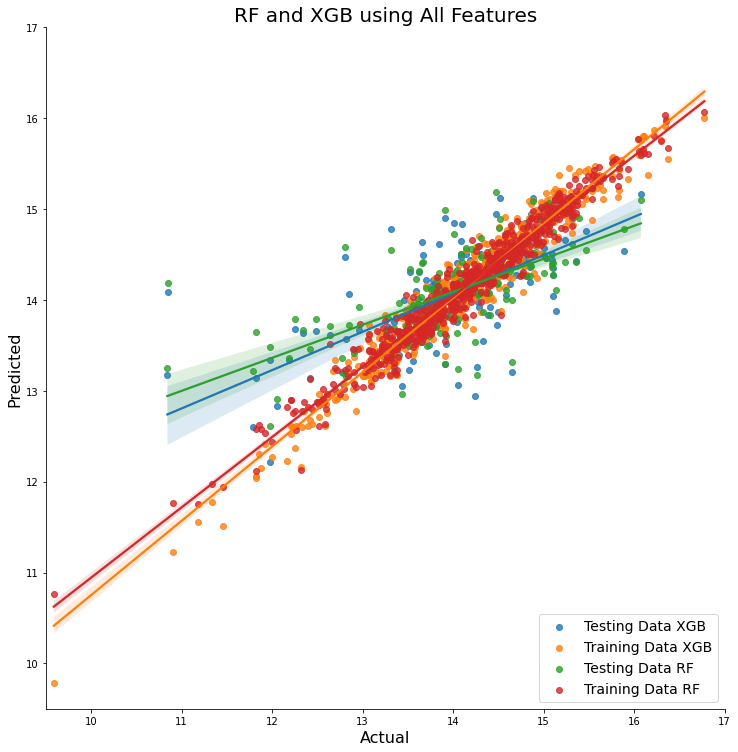

In [5]:
mae = getMAEandPlots(xgb, X_log_train, X_log_test, y_log_train, y_log_test)

In [6]:
X_corr, X_train_corr, X_test_corr = getCorrAndHighCorrFeatures(X_log, y_log, X_log_train, X_log_test)

In [7]:
xgb_corr = buildNewModelAndFit(params, X_train_corr, y_log_train)

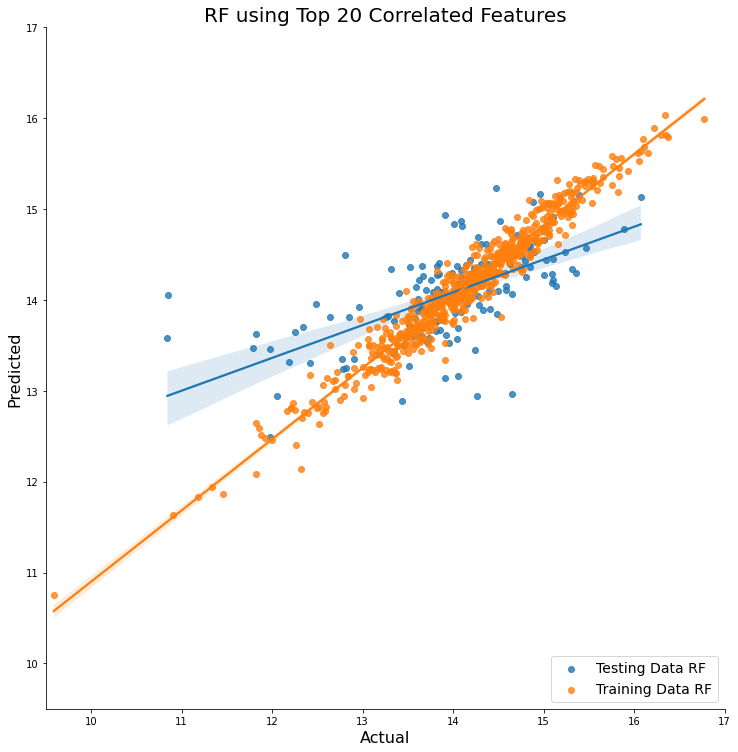

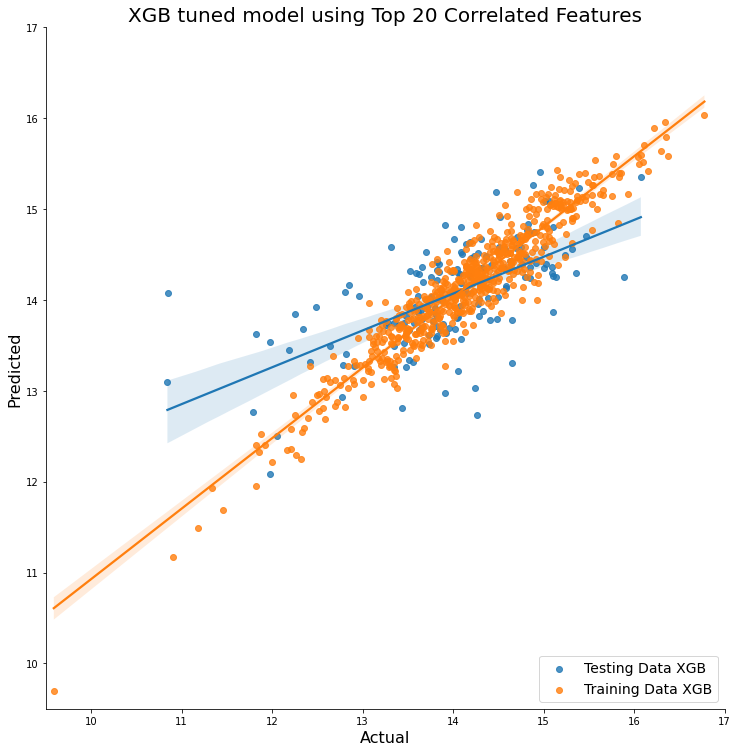

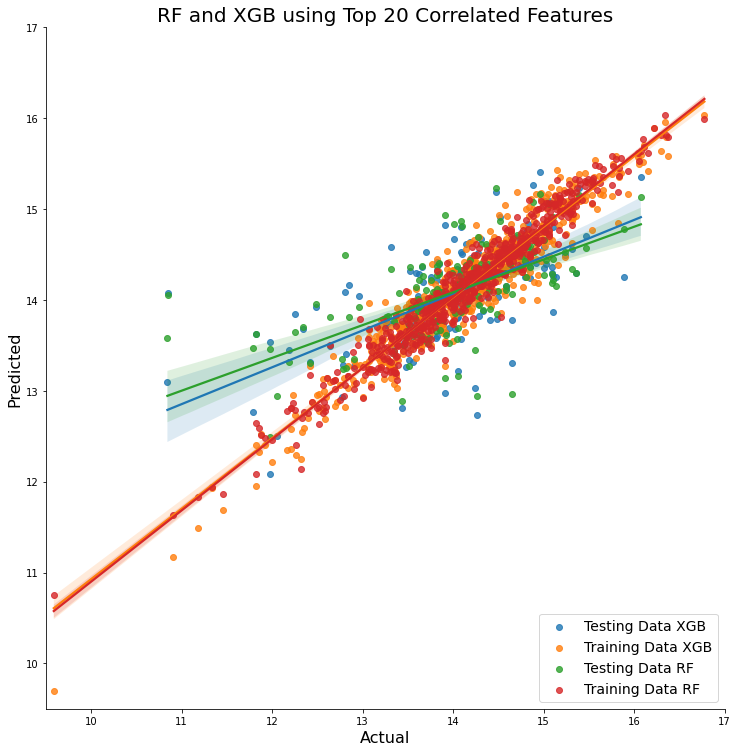

In [8]:
mae_corr = getMAEandPlots(xgb_corr, X_train_corr, X_test_corr, y_log_train, y_log_test, 'Top 20 Correlated Features')

In [9]:
perm_xgb, perm_regr, X_RF_train, X_RF_test, X_XGB_train, X_XGB_test = permImportance(params, X_log_train, X_log_test, y_log_train, y_log_test)

In [10]:
xgb_RF_perm = buildNewModelAndFit(params, X_RF_train, y_log_train)

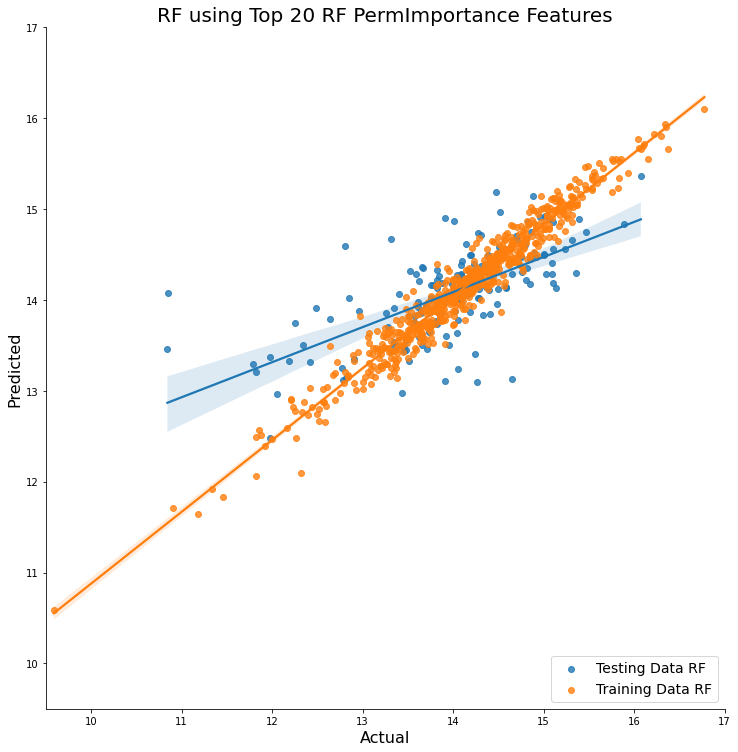

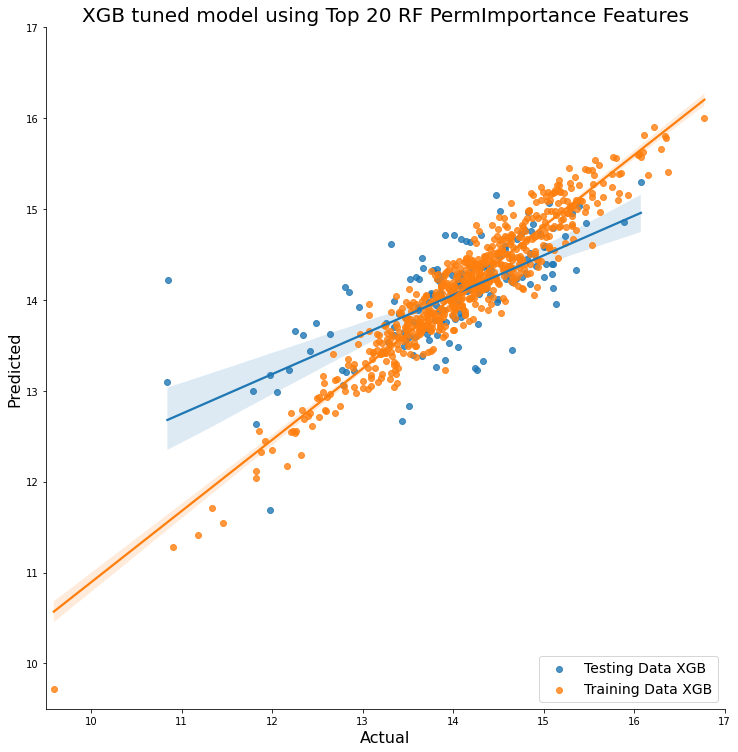

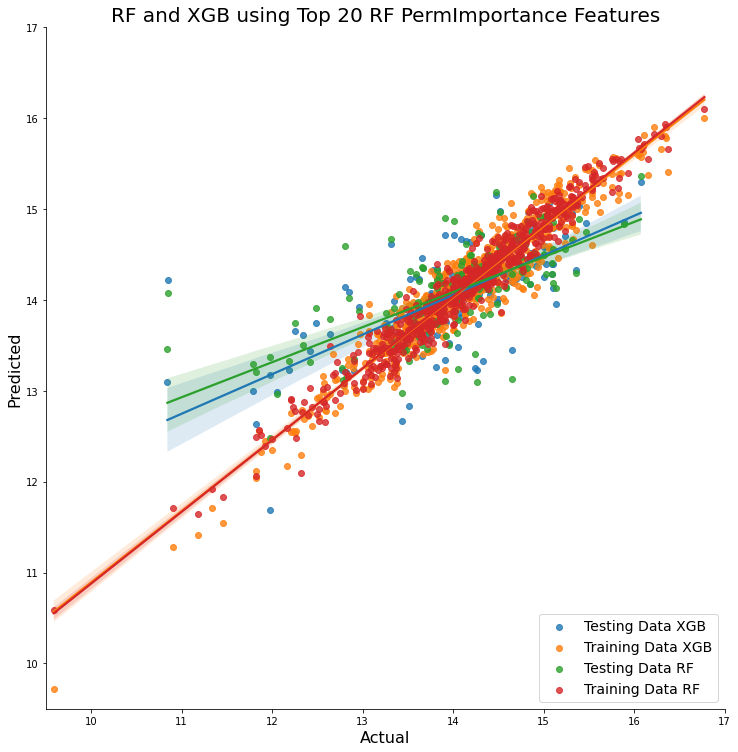

In [11]:
mae_RF_perm = getMAEandPlots(xgb_RF_perm, X_RF_train, X_RF_test, y_log_train, y_log_test, 'Top 20 RF PermImportance Features')

In [12]:
xgb_XGB_perm = buildNewModelAndFit(params, X_XGB_train, y_log_train)

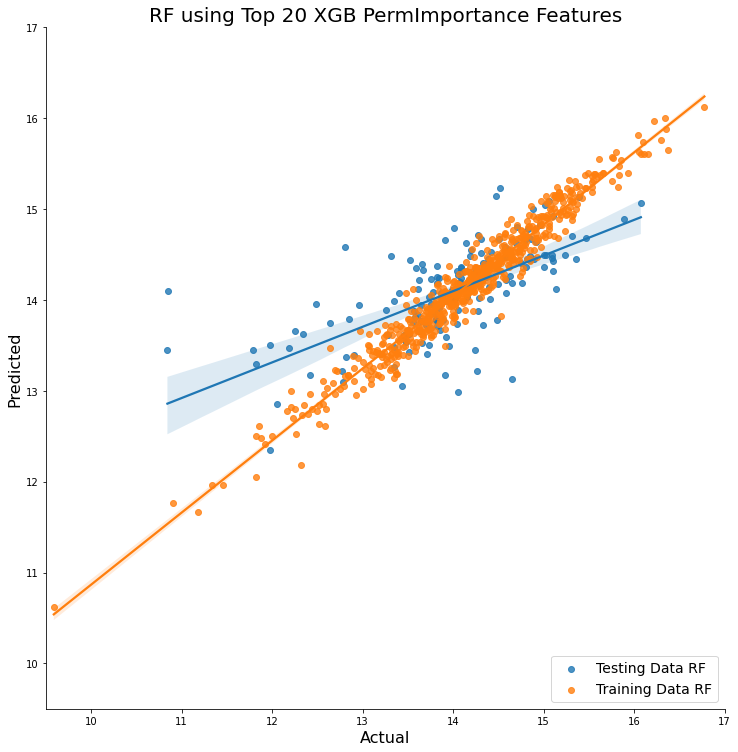

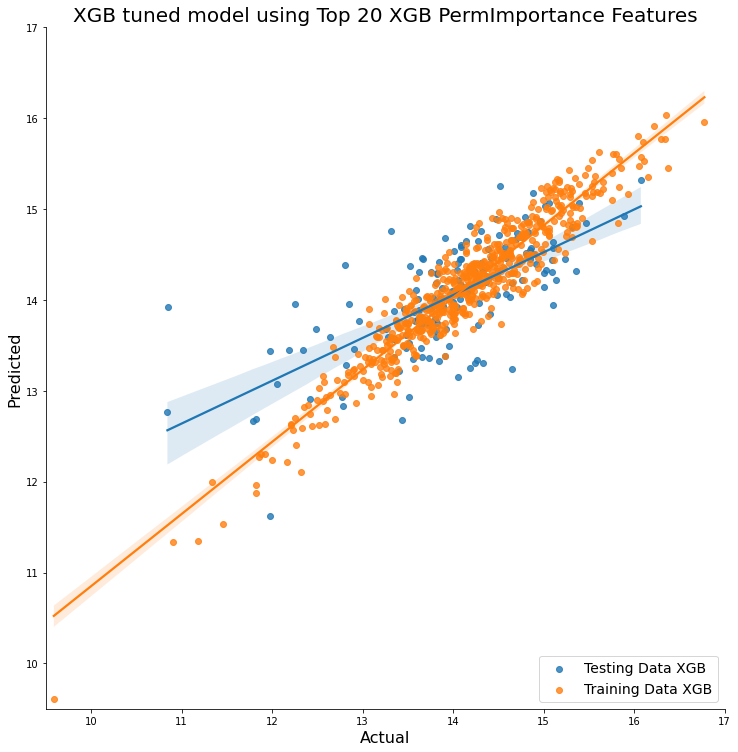

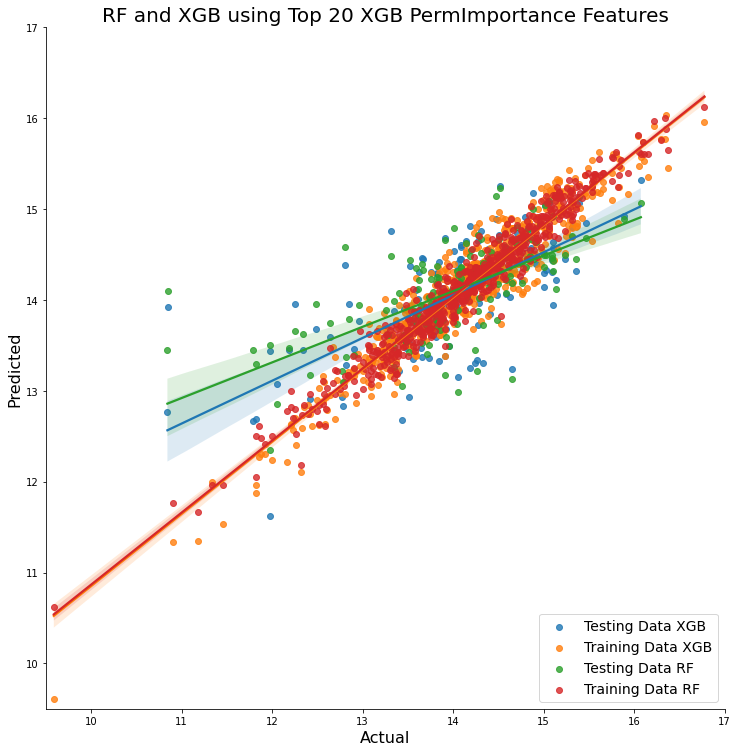

In [13]:
mae_XGB_perm = getMAEandPlots(xgb_XGB_perm, X_XGB_train, X_XGB_test, y_log_train, y_log_test, 'Top 20 XGB PermImportance Features')

In [14]:
import pickle

In [15]:
file = open('XGB_ALL_PARAMS', 'wb')

In [16]:
pickle.dump(xgb, file)

In [17]:
file.close()

In [18]:
file = open('XGB_ALL_PARAMS', 'rb')

In [19]:
xgb2 = pickle.load(file)

xgb2.predict(X_log_test)

array([14.461779 , 14.613788 , 14.619961 , 13.941195 , 13.210609 ,
       14.1981535, 14.099064 , 14.341884 , 14.060966 , 13.669762 ,
       13.513958 , 13.925685 , 14.055855 , 14.4349785, 14.481005 ,
       13.257624 , 13.787142 , 15.004596 , 13.621206 , 13.171269 ,
       14.214417 , 13.059783 , 13.398114 , 13.077913 , 14.944991 ,
       13.205778 , 13.921218 , 13.325617 , 14.468273 , 14.07703  ,
       13.567317 , 14.489639 , 14.442953 , 14.360242 , 14.276454 ,
       14.045558 , 14.074244 , 13.138698 , 13.719844 , 13.741066 ,
       14.42423  , 13.871207 , 13.685709 , 13.635536 , 14.361426 ,
       12.212929 , 13.333785 , 14.440861 , 13.544118 , 14.503919 ,
       14.182226 , 15.043922 , 13.146119 , 14.534032 , 14.169062 ,
       13.297744 , 14.658616 , 12.827651 , 14.780853 , 14.558775 ,
       14.887509 , 15.12566  , 14.403701 , 14.428802 , 14.844323 ,
       13.718803 , 13.8003   , 13.913694 , 15.024848 , 13.845245 ,
       13.514087 , 14.079478 , 14.047965 , 13.882464 , 15.1263